# üì¨ Ol√°, neste projeto iremos desbravar a **Estat√≠stica descritiva** e analisar um DataFrame retirado de um gmail e responder algumas perguntas, venha comigo nesta jornada.

### Importando as bibliotecas necess√°rias para o projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### üóÑ Primeiro lendo os arquivos de email:

In [2]:
email = pd.read_csv("https://raw.githubusercontent.com/vinimedeiros13/Statistic/main/Projeto/Projeto%202/emails_processadoss.csv")

#### Removendo o √≠ndice 0 que est√° atrapalhando as colunas:

In [3]:
email.drop('Unnamed: 0', axis='columns', inplace=True)

#### Exibindo uma pequena parte do DataFrame:

In [4]:
email.head()

subject                   from  \
0  =?UTF-8?q?Voc=C3=AA_tem_que_ter_estes_itens_em...        offers@wish.com   
1                =?UTF-8?Q?=E3=80=90E-Pal=E3=80=91?=       official@epal.gg   
2                            DSCO is now available!   vsco@official.vsco.co   
3  =?UTF-8?q?=E2=9A=A1=F0=9F=94=8C_Todo_o_materia...        offers@wish.com   
4  =?UTF-8?q?=F0=9F=8E=89_Confira_o_que_acabou_de...        offers@wish.com   

         date                                                 to  label  \
0  2021-02-26  "=?utf-8?q?Vin=C3=ADcius_Medeiros?=" <viniapnm...  inbox   
1  2021-03-06                                 viniapnm@gmail.com  inbox   
2  2021-02-28                                 viniapnm@gmail.com  inbox   
3  2021-04-24  "=?utf-8?q?Vin=C3=ADcius_Medeiros?=" <viniapnm...  inbox   
4  2021-02-04  "=?utf-8?q?Vin=C3=ADcius_Medeiros?=" <viniapnm...  inbox   

                thread dayofweek  timeofday  year     month  
0  1692770206194795587    Friday  11.963333  2021  February  
1  1693525113471893522  Saturday  19.945556  2021     March  
2  1692992869753561945    Sunday  21.389167  2021  February  
3  1697932412812193275  Saturday  11.481111  2021     April  
4  1690770887097317107  Thursday  10.324722  2021  February

## üì¨ Temos emails de **2015** at√© **2021**, emails promocionais especificamente.

## **1) Quantos emails foram mandados por semana, por m√™s e por ano, considerando a janela de tempo dos dados baixados?**

#### Criando 3 vari√°veis:
* anos -> Ir√° armazenar os dados(emails) filtrando por anos
* mes -> Ir√° armazenar os dados(emails) filtrando por m√™s
* dia -> Ir√° armazenar os dados(emails) filtrando a cada 7 dias da primeira a √∫ltima semana registrado

In [5]:
anos = email["year"].value_counts()

In [6]:
mes = email["month"].value_counts()

In [7]:
email['date'] = pd.to_datetime(email['date'])
dia = email.resample('W', on='date')['dayofweek'].count()

### Exibindo os emails por ano:

In [8]:
anos

2019    560
2020    377
2021    152
2016     23
2017     21
2018     19
2015      7
Name: year, dtype: int64

### üì® Logo de cara percebemos que 2019 foi o ano com mais emails

### Exibindo os emails recebidos por m√™s:

In [9]:
mes

March        165
April        145
July         124
August       118
May          108
June         102
February      83
January       81
November      77
December      60
September     49
October       47
Name: month, dtype: int64

### üì® Mar√ßo e abril foram os meses onde mais houveram emails

In [10]:
dia

date
2015-05-03     1
2015-05-10     1
2015-05-17     1
2015-05-24     0
2015-05-31     0
              ..
2021-03-28     7
2021-04-04     8
2021-04-11    10
2021-04-18    10
2021-04-25     7
Freq: W-SUN, Name: dayofweek, Length: 313, dtype: int64

### üì® Ter√ßa e quarta foram os dias da semana onde mais houveram emails

#### Criando listas com strings que usaremos nos gr√°ficos e nos DataFrames

In [11]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Set', 'Ago', 'Out', 'Nov', 'Dez']

In [12]:
total_anos = ("2015", "2016", "2017", "2018", "2019", "2020", "2021")

In [13]:
semanas = ["Segunda", "Ter√ßa", "Quarta", "Quinta", "Sexta", "S√°bado", "Domingo"]

## üóÉ **Emails por ano**

#### Criando vari√°veis de cada ano para utilizar na cria√ß√£o de gr√°ficos

In [14]:
ano_2015 = anos[2015]
ano_2016 =  anos[2016]
ano_2017 =  anos[2017]
ano_2018 =  anos[2018]
ano_2019 =  anos[2019]
ano_2020 =  anos[2020]
ano_2021 =  anos[2021]

#### Criando um DataFrame para armazenar a quantidade de emails por anos

In [15]:
_anos = (ano_2015, ano_2016, ano_2017, ano_2018, ano_2019, ano_2020, ano_2021)
aanos = pd.DataFrame(_anos, total_anos)
aanos[0] = aanos[0].round(3)
aanos

0
2015    7
2016   23
2017   21
2018   19
2019  560
2020  377
2021  152

### üìä Plotando o gr√°fico para facilitar a visibilidade dos dados:

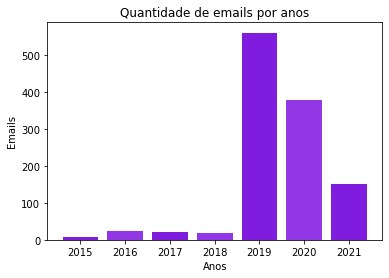

In [16]:
plt.bar(total_anos, _anos, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails")
plt.xlabel("Anos")
plt.title("Quantidade de emails por anos")
plt.show()

### üìâ Ent√£o temos 2019 l√≠der de emails, em seguida 2020 e 2021.

## üóÉ **Emails por m√™s**

#### Criando vari√°veis para armazenar os dados dos meses e usar posteriormente para plotar gr√°ficos

In [17]:
Janeiro = mes["January"]
Fevereiro = mes["February"]
Mar√ßo = mes["March"]
Abril = mes["April"]
Maio = mes["May"]
Junho = mes["June"]
Julho = mes["July"]
Agosto = mes["August"]
Setembro = mes["September"]
Outubro = mes["October"]
Novembro = mes["November"]
Dezembro = mes["December"]

#### Criando um DataFrame para armazenar a quantidade de emails por meses

In [18]:
_meses = (Janeiro, Fevereiro, Mar√ßo, Abril, Maio, Junho, Julho, Agosto, Setembro, Outubro, Novembro, Dezembro)
_Meses = pd.DataFrame(_meses, meses)
_Meses[0] = _Meses[0].round(3)
_Meses

0
Jan   81
Fev   83
Mar  165
Abr  145
Mai  108
Jun  102
Jul  124
Set  118
Ago   49
Out   47
Nov   77
Dez   60

### üìä Plotando o gr√°fico para facilitar a visibilidade dos dados:

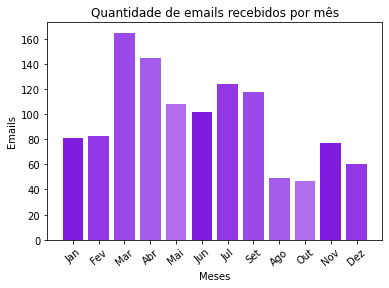

In [19]:
plt.bar(meses, _meses, color=["#801cdd", "#9237e6", "#9c49e9", "#a65ceb", "#b06eed"])
plt.ylabel("Emails")
plt.xticks(rotation=40)
plt.xlabel("Meses")
plt.title("Quantidade de emails recebidos por m√™s")
plt.show()

### Mar√ßo foi o m√™s onde mais houve mensagens, outubro teve a menor quantidade.

### Podemos justificar mar√ßo com mais emails levando em considera√ß√£o que mar√ßo tem alguns feriados como dia da mulher, podendo vir ofertas de produtos femininos. E mar√ßo √© o m√™s p√≥s virada de ano e carnaval, ou seja, h√° uma movimenta√ß√£o comercial maior ap√≥s essas datas.

## üóÉ **Emails por dias da semana**

### Para agrupar emails por semana (a cada 7 dias):

In [20]:
email['date'] = pd.to_datetime(email['date'])
dia = email.resample('W', on='date')['dayofweek'].count()
dia.to_frame()

dayofweek
date                 
2015-05-03          1
2015-05-10          1
2015-05-17          1
2015-05-24          0
2015-05-31          0
...               ...
2021-03-28          7
2021-04-04          8
2021-04-11         10
2021-04-18         10
2021-04-25          7

[313 rows x 1 columns]

### üìä Plotando o gr√°fico para facilitar a visibilidade dos dados:

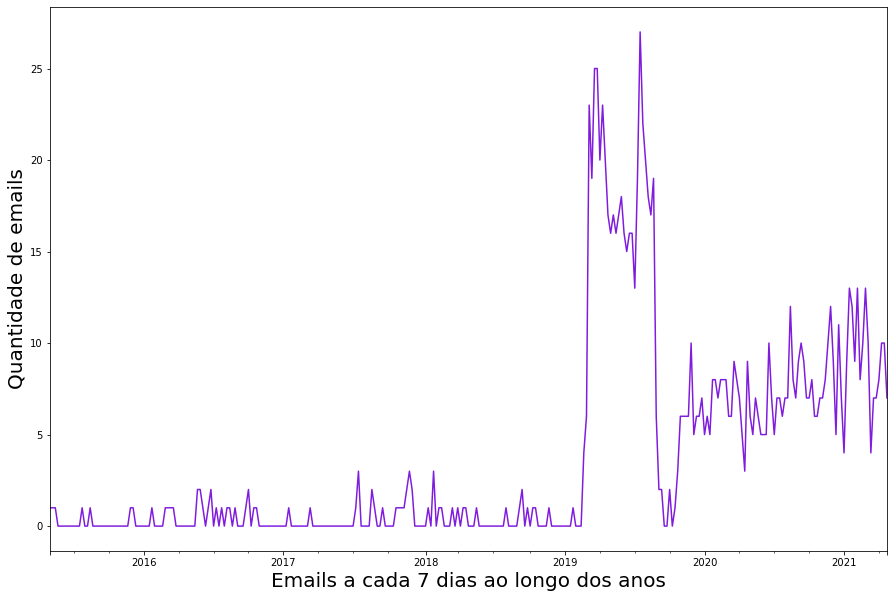

In [21]:
plt.figure(figsize=(15,10))
dia.plot(color=["#801cdd"])
plt.xlabel("Emails a cada 7 dias ao longo dos anos", size=20)
plt.ylabel("Quantidade de emails", size=20)
plt.show()

### H√° um pico de emails por semana a parti de 2019, o que faz sentido olhando o gr√°fico de anos. 2019 chega a ter +25 emails por semanam Esses valores come√ßam a cair em 2020, passando a ter no m√°ximo 15 emails por semana.

## **2) H√° uma varia√ß√£o significativa na quantidade de emails enviados por cada per√≠odo considerado na quest√£o anterior?**

### üìù Tirando o desvio padr√£o dos emails recebidos por anos:

In [86]:
anosdesvio = anos.std(ddof=0)
anosdesvio

202.94816871229332

In [87]:
anosmedia = anos.mean()

### üìù Agora calculando a vari√¢ncia:

In [88]:
anos_var = anosdesvio*anosmedia/100
anos_var

336.0241821964971

### üìù Tirando o desvio padr√£o dos emails recebidos por m√™s:

In [89]:
mesdesvio = mes.std(ddof=0)
mesdesvio

35.66851630717986

In [90]:
mesmedia = mes.mean()

### üìù Agora calculando a vari√¢ncia:

In [91]:
mes_var = mesdesvio*mesmedia/100
mes_var

34.449842000017874

### üìù Tirando o desvio padr√£o dos emails recebidos por dia:

In [92]:
diadesvio = dia.std(ddof=0)
diadesvio

5.656110781815365

In [93]:
diamedia = dia.mean()

### üìù Agora calculando a vari√¢ncia:

In [30]:
dia_var = diadesvio*diamedia/100
dia_var

0.20943873470044752

## **3) Existe algum per√≠odo, dos considerados nas duas quest√µes anteriores, em que o n√∫mero de emails enviados possa ser considerado um outlier? Voc√™ enxerga alguma justificativa para esse per√≠odo ter esse outlier, caso haja?**

## üìÜ Come√ßando pelos **Meses**

#### DataFrame dos meses criado anteriormente, agora utilizado para plotar um gr√°fico boxplot.

In [31]:
_Meses

0
Jan   81
Fev   83
Mar  165
Abr  145
Mai  108
Jun  102
Jul  124
Set  118
Ago   49
Out   47
Nov   77
Dez   60

#### Usando a fun√ß√£o describe para ver m√©dia, mediana, valor m√°ximo, etc.

In [32]:
_Meses.describe()

0
count   12.000000
mean    96.583333
std     37.254550
min     47.000000
25%     72.750000
50%     92.500000
75%    119.500000
max    165.000000

### M√©dia = 96
### Mediana = 92
### Desvio padr√£o = 37
### Valor m√≠nimo = 47
### Valor m√°ximo = 165

### H√° um c√°lculo para verificar a presen√ß√£o de Outliers:
`Q + 1.5*IQR` <br>
Q = Valor m√°ximo ou m√≠nimo <br>
IQR = Valores do percentil 75% - 25%

### üìà Plotando o boxplot e verificar a exist√™ncia de um outlier:

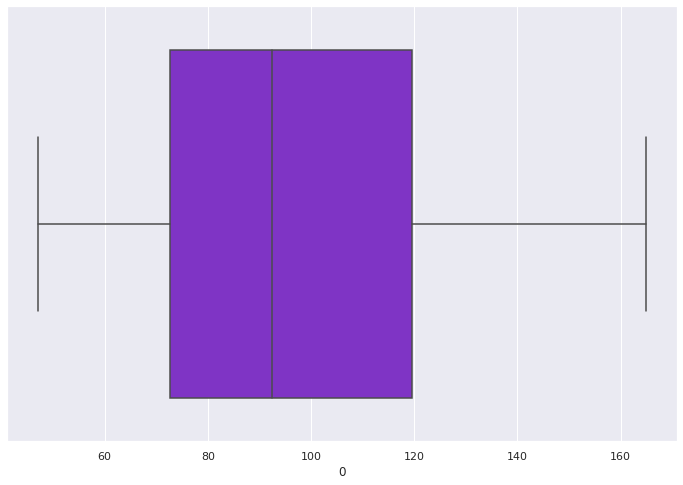

In [33]:
sns.set(rc={'figure.figsize':(12,8)})
Box_mes = sns.boxplot(x=_Meses[0], color="#801cdd")

### N√£o h√° presen√ßa de Outliers, isso significa que n√£o temos valores altos ou baixos demais, podemos ver isso pelo c√°lculo visto anteriormente.

`119 + (1.5*(119-72)) = 189.5`

### Ou seja, o valor resultante est√° dentro do intervalo de valores m√°ximos ou m√≠nimos do boxplot

## üìÜ Agora em **Anos**

#### DataFrame dos anos criado anteriormente, agora utilizado para plotar um gr√°fico boxplot.

In [34]:
aanos

0
2015    7
2016   23
2017   21
2018   19
2019  560
2020  377
2021  152

#### Usando a fun√ß√£o describe para ver m√©dia, mediana, valor m√°ximo, etc.

In [35]:
aanos.describe()

0
count    7.000000
mean   165.571429
std    219.209076
min      7.000000
25%     20.000000
50%     23.000000
75%    264.500000
max    560.000000

### M√©dia = 165
### Mediana = 23
### Desvio padr√£o = 219
### Valor m√≠nimo = 7
### Valor m√°ximo = 560

### üìà Plotando o boxplot e verificar a exist√™ncia de um outlier

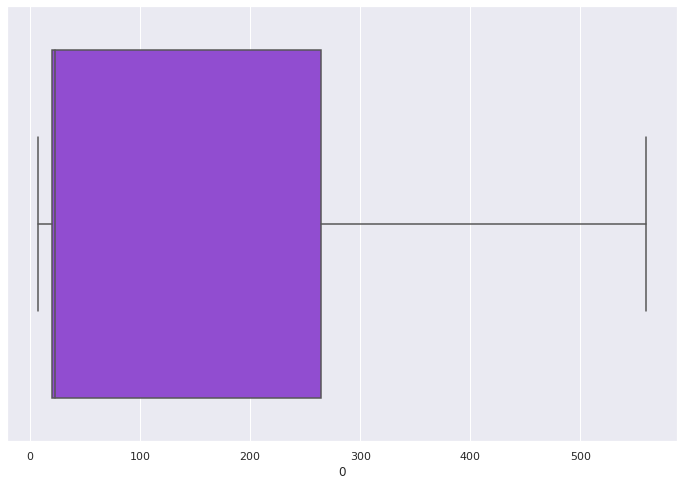

In [36]:
sns.set(rc={'figure.figsize':(12,8)})
Box_ano = sns.boxplot(x=aanos[0], color="#9237e6")

### Tamb√©m n√£o h√° presen√ßa de Outliers, verificando pelo c√°lculo:

`264 + (1.5*(264-20) = 630` <br>
### N√£o h√° valores que ultrapassem o valor m√°ximo de 630, logo n√£o h√° presen√ßa de Outliers

## üìÜ Finalizando com os **dias da semana**

In [37]:
dia

date
2015-05-03     1
2015-05-10     1
2015-05-17     1
2015-05-24     0
2015-05-31     0
              ..
2021-03-28     7
2021-04-04     8
2021-04-11    10
2021-04-18    10
2021-04-25     7
Freq: W-SUN, Name: dayofweek, Length: 313, dtype: int64

#### Usando um sort_values para ver as ocorr√™ncias dos valores, ascending = False para organizar do maior para o menor

In [38]:
dia.sort_values(ascending=False).head(5)

date
2019-07-21    27
2019-03-31    25
2019-03-24    25
2019-03-10    23
2019-04-14    23
Name: dayofweek, dtype: int64

#### Usando a fun√ß√£o describe para ver m√©dia, mediana, valor m√°ximo, etc.

In [39]:
dia.describe()

count    313.000000
mean       3.702875
std        5.665168
min        0.000000
25%        0.000000
50%        1.000000
75%        6.000000
max       27.000000
Name: dayofweek, dtype: float64

### M√©dia = 3
### Mediana = 1
### Desvio padr√£o = 5
### Valor m√≠nimo = 0
### Valor m√°ximo = 27

### üìà Plotando o boxplot e verificar a exist√™ncia de um outlier

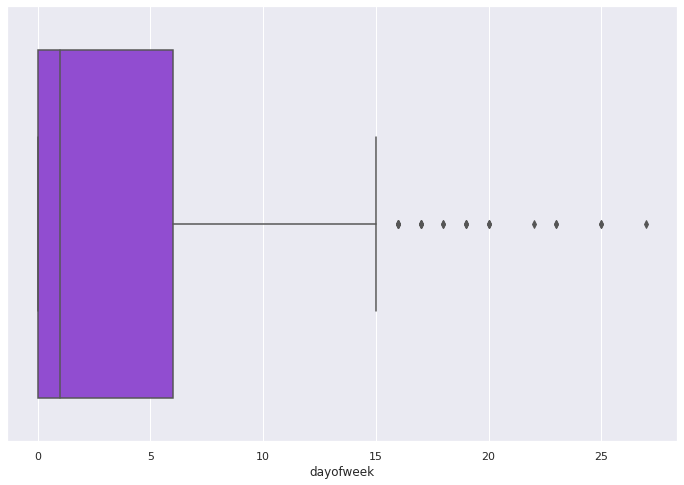

In [40]:
sns.set(rc={'figure.figsize':(12,8)})
Box_semanas = sns.boxplot(x=dia, color="#9237e6")

### Agora h√° presen√ßa de Outliers, vamos entender o por que
#### Fazendo os c√°lculos:

`6 + (1.5*(6)) = 15`

### H√° muitos valores que ultrapassam 15, vejamos alguns:

In [41]:
dia.sort_values(ascending=False).head(10)

date
2019-07-21    27
2019-03-31    25
2019-03-24    25
2019-03-10    23
2019-04-14    23
2019-07-28    22
2019-04-07    20
2019-04-21    20
2019-08-04    20
2019-08-25    19
Name: dayofweek, dtype: int64

### Ou seja, v√°rias semanas receberam mais de 15 emails, que √© um valor acima do valor m√°ximo.

## **4) Qual √© o n√∫mero m√©dio de e-mails por hora? Essa m√©dia varia ao longo da semana?**

## Retirando uma amostra dos dados completos e escolhendo os meses de abril e novembro de 2020 para fazer as compara√ß√µes:

### M√©dia de emails por semana no mes de **abril de 2020**

In [42]:
abril= email[email.month=="April"]
Abril2020 = abril[abril.year==2020]
abril2020 = pd.DataFrame(Abril2020[["year","date","dayofweek"]])

In [43]:
m√©diaabril = 25/720
m√©diaabril

0.034722222222222224

### üóÉ No m√™s de abril de 2020 houve uma m√©dia de 0.03 de emails recebidos por hora.

### M√©dia de emails por semana no mes de **novembro de 2020**

In [44]:
November = email[email.month=="November"]
November2020 = November[November.year==2020]
november2020 = pd.DataFrame(November2020[["year","date","dayofweek"]])

In [45]:
m√©dianovembro = 39/720
m√©dianovembro

0.05416666666666667

In [46]:
x = ['Abril', "Novembro"]
y = [m√©diaabril, m√©dianovembro]

### üóÉ Em novembro a m√©dia subiu para 0.05 emails por hora.

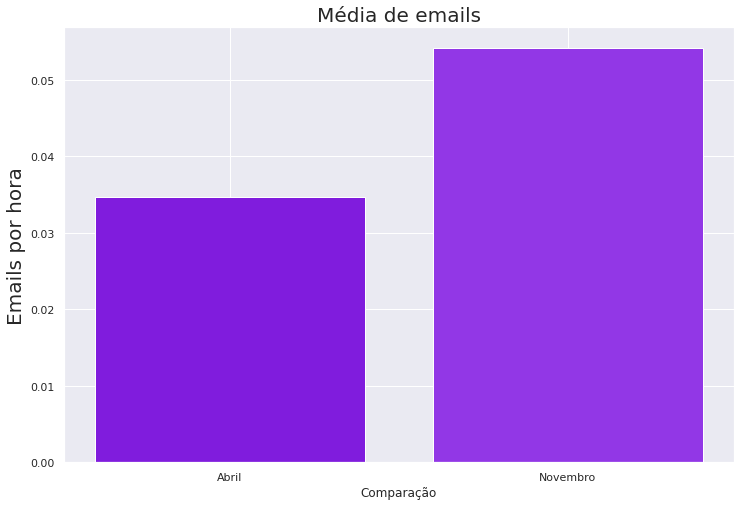

In [47]:
plt.bar(x, y, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails por hora", size=20)
plt.xlabel("Compara√ß√£o")
plt.title("M√©dia de emails", size=20)
plt.show()

### Se justifica Novembro ter recebido mais emails promocionais por ser final de ano, √©poca de mais vendas de produtos. Ent√£o a m√©dia de emails em novembro foi superior a de abril.

## **5) Com quem me comunico com mais frequ√™ncia, por meio de emails? Considere tanto por envio, quanto por recep√ß√£o de emails**

#### Criando uma lista com os principais remetentes dos e-mails

In [48]:
rec = ["Wish", "Depositphotos", "Motorola", "Googleplay", "iFood", "Canva"]

#### Exibindo os remetentes que mais enviaram e-mails

In [49]:
From = pd.DataFrame(email['from'])
From = From.value_counts().head(6)
From

from                      
offers@wish.com               907
mail@depositphotos.com         75
info@motorola-mail.com         39
news-googleplay@google.com     25
news@news.ifood.com.br         16
start@engage.canva.com         15
dtype: int64

### üìä Mostrando os dados da tabela graficamente:

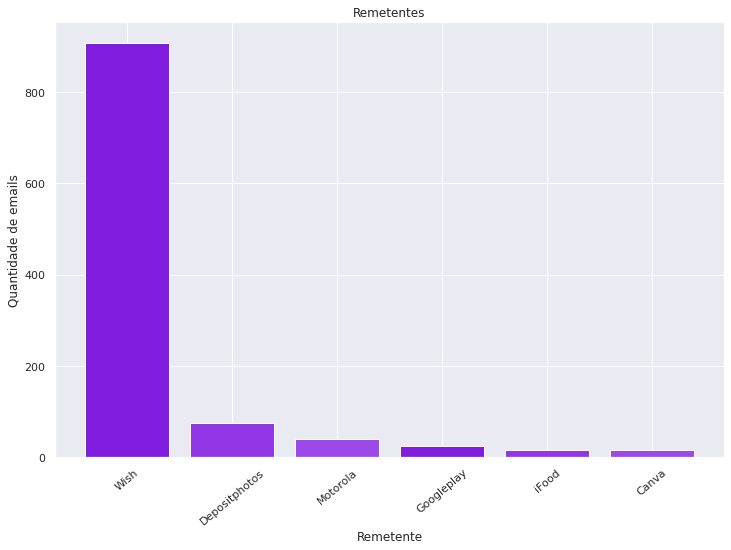

In [50]:
plt.bar(rec, From, color=["#801cdd", "#9237e6", "#9c49e9"])
plt.ylabel("Quantidade de emails")
plt.xticks(rotation=40)
plt.xlabel("Remetente")
plt.title("Remetentes")
plt.show()

### üìâ Wish aparece gritantemente em primeiro, possivelmente por enviar diariamente emails com promo√ß√µes de produtos

## **6) Quais os temas mais comumente tratados nos emails considerados?**

#### Removendo alguns caracteres indesejados que est√£o atrapalhando a visualiza√ß√µes dos assuntos dos emails

In [84]:
stopwords = set(STOPWORDS)
stopwords.update(["UTF", '=?UTF-8?q?', "F7", "q", "A7", "A3", "AA", "U", "A5", "A3", "F0", "3F", "C3", "9F", "8C", "E2", "8F", "_"])

#### Gerando uma n√∫vem de palavras para exibir os assuntos mais presentes nos emails

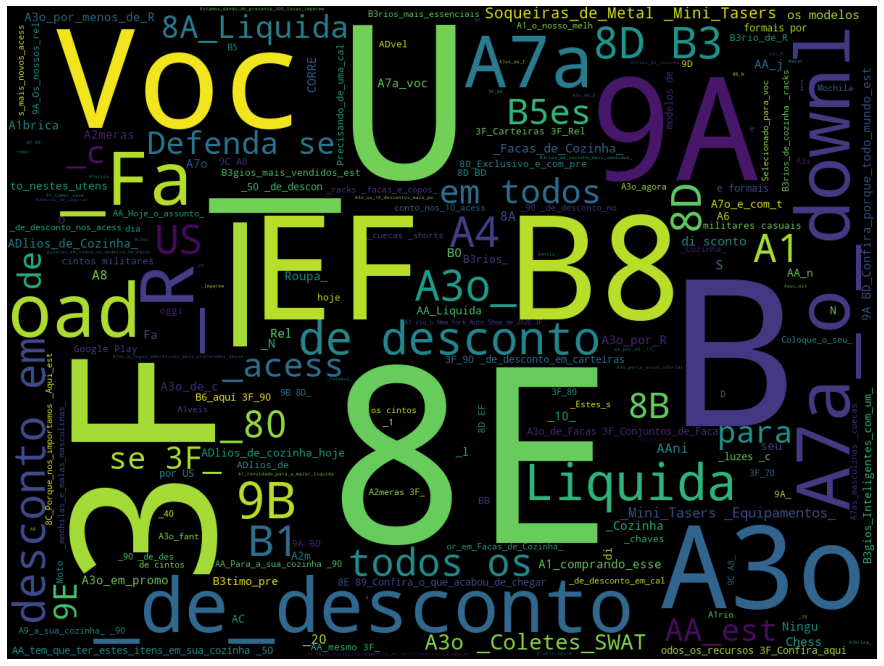

In [85]:
text=  " ".join(s for s in email.subject)
wordcloud = WordCloud(width=1200, height=900, background_color="black", stopwords = stopwords).generate(text)
fig, ax = plt.subplots(figsize=(25,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

### Nuvem de palavras com os assuntos principais dos Emails

## **Por que os m√™s de abril recebeu menos emails que novembro no ano de 2020?**

#### Verificando a quantidade de emails recebidos em abril de 2020

In [53]:
abril2020["year"].value_counts()

2020    25
Name: year, dtype: int64

#### Verificando a quantidade de emails recebidos em novembro de 2020

In [54]:
november2020["year"].value_counts()

2020    39
Name: year, dtype: int64

In [55]:
valores = [25, 39]

In [56]:
MESES = ["Abril", "Novembro"]

### üìä Plotando o gr√°fico para fazer as compara√ß√µes

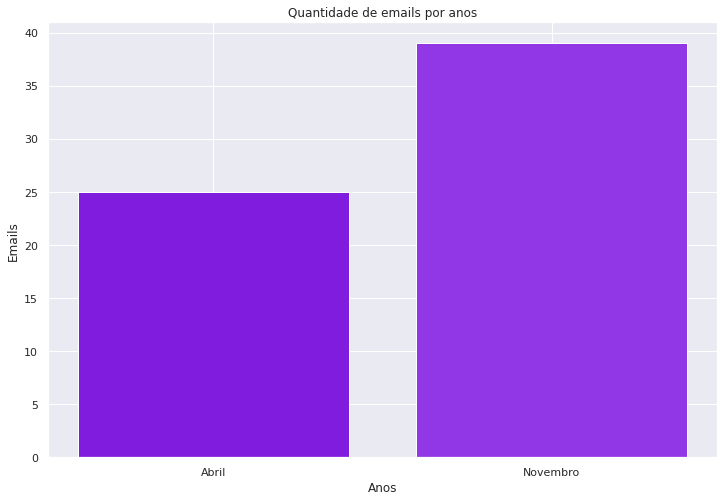

In [57]:
plt.bar(MESES, valores, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails")
plt.xlabel("Anos")
plt.title("Quantidade de emails por anos")
plt.show()

### Igual visto anteriormente, Novembro se caracteriza por ser o in√≠cio de vendas de produtos do final de ano. Liquida√ß√µes, promo√ß√µes em todas as lojas, h√° tamb√©m a black friday, onde v√°rios brasileiros compram produtos diversos. Isso justifica o pico de Emails promocionais em novembro.

## **Qual o hor√°rio de pico de recebimentos de email?**

#### Pegando a coluna "timeofday" para filtrar as horas de email

In [58]:
email["timeofday"]
horas = email['timeofday'].astype(int)
Horas = horas.value_counts()
listvalues = Horas.values

In [59]:
listhoras = Horas.index

### üìä Plotando o gr√°fico

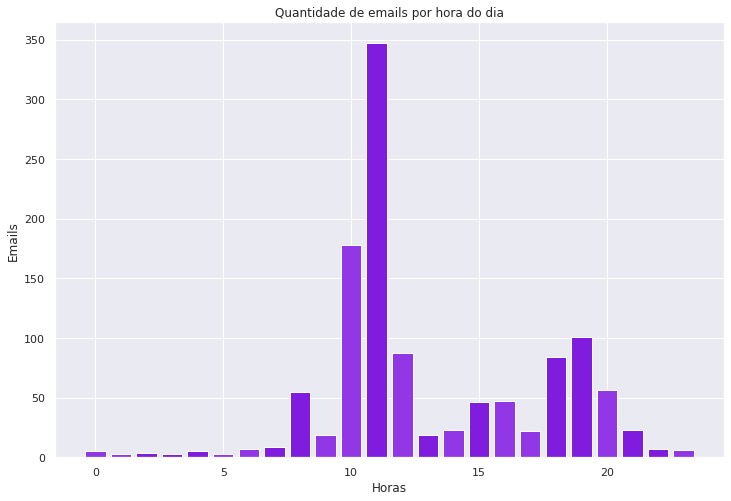

In [60]:
plt.bar(listhoras, listvalues, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails")
plt.xlabel("Horas")
plt.title("Quantidade de emails por hora do dia")
plt.show()

### Dessa forma, 11 horas foi o hor√°rio pico de emails, chegando a receber quase 350 emails. 10 horas recebeu 160 emails, ficando em segundo lugar, depois das 11 horas os emails ficaram entre 20 e 100.

## Enfim, finalizamos nossa an√°lise dos Emails promocionais. Achei muito interessante analisar meu inbox promocional e perceber o tanto de promo√ß√£o que perdi haha. Estat√≠stica descritiva √© uma √°rea muito interessante e pretendo fazer mais projetos como esse.